In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/celebal-tech-aqi-prediction/real_2013.csv
/kaggle/input/celebal-tech-aqi-prediction/real_2014.csv
/kaggle/input/celebal-tech-aqi-prediction/real_2016.csv
/kaggle/input/celebal-tech-aqi-prediction/Real_Combine.csv
/kaggle/input/celebal-tech-aqi-prediction/real_2015.csv


 # ***Introduction***
>  # *Context*

***Fine particles are very small airborne particles that have a diameter of less than 2.5 microns. The smaller the particles, the deeper they can travel into the lungs while breathing. It can cause serious health effects including heart and lung disease. Children, the elderly, and people with heart and lung disease, asthma, or chronic illnesses are more sensitive to the effects of PM2.5 exposure.***

***Bengaluru, otherwise known as Bangalore, is the capital city of the state of Karnataka. It comes in ranked at 82nd of the most polluted cities in India, with a 2019 PM2.5 rating of 32.6 µg/m³. PM2.5 stands for particulate matter that is 2.5 or less micrometers across, and consists of many chemicals or compounds that can have a multitude of negative effects on the health of anyone who breathes it in.***

***It comes in at 361st place in regards to the most polluted cities in the world, with many of its months recorded in 2019 coming in at a moderate rating, five of them coming in a an ‘unhealthy for sensitive groups’ rating, and one month coming in at ‘unhealthy’, which would require a reading of anywhere between 55.5 to 150.4 µg/m³ on the PM2.5 ranking, making it considerably more polluted during certain months, that would require a large number of people to be wary of the air they are breathing during these poorly ranked months, with demographics such as the young, elderly and those with preexisting medical conditions being at highest risk.***

***So, with cars and other vehicles being stated as the main culprit in the production of air pollution and high numbers of PM2.5, the other main offender would appear to be the construction industry. The construction industry would create high amounts of pollutants, via the production of its needed components that are factory made on a high industrial scale, as well as putting out metric tons of dust into the air from construction sites, consisting of fine particles of metals, plastics as well as dust from concrete and other similar materials. These would all contribute highly to the Poor US AQI ratings as well as the high levels of PM2.5 found in the air.***

> # *Data Dictionary*

***This Dataset contains the meteorological and Particulate matter attributes of Bangalore City from 2013-2015***

***Each Row in the Dataset represents average value of the attributes of that particular day***


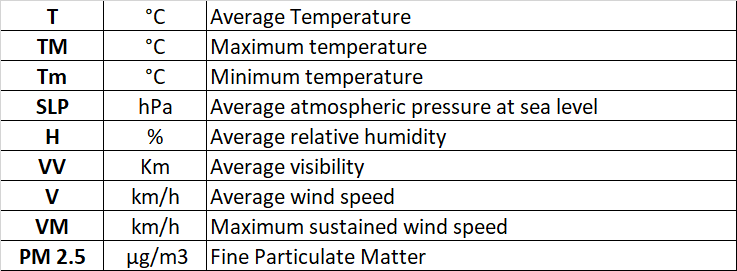

# ***Feature Engineering + EDA***

> # *Importing Packages*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

> # > *Lets Import the Data and understand it*

In [4]:
df = pd.read_csv('/kaggle/input/celebal-tech-aqi-prediction/Real_Combine.csv')
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


> ***Display the top 5 Rows***

In [5]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


> **Shape of the Data**

In [6]:
df.shape

(1093, 9)

> **Data has 1093 Rows and 9 Columns**

***Lets learn about the Data through Describe Function***

In [7]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


**Lets learn about the Dtypes**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


**Lets see the Unique values of each Attribute**

In [9]:
df.nunique()
#This Implies that each Data is numerical and not categorical

T         243
TM        238
Tm        223
SLP       254
H          76
VV         22
V          94
VM         27
PM 2.5    555
dtype: int64

**Lets Discover the NULL values Below**

In [10]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  1093


,Total Missing,In Percent
PM 2.5,1,0.09
T,0,0.00
TM,0,0.00
Tm,0,0.00
SLP,0,0.00
H,0,0.00
VV,0,0.00
V,0,0.00
VM,0,0.00


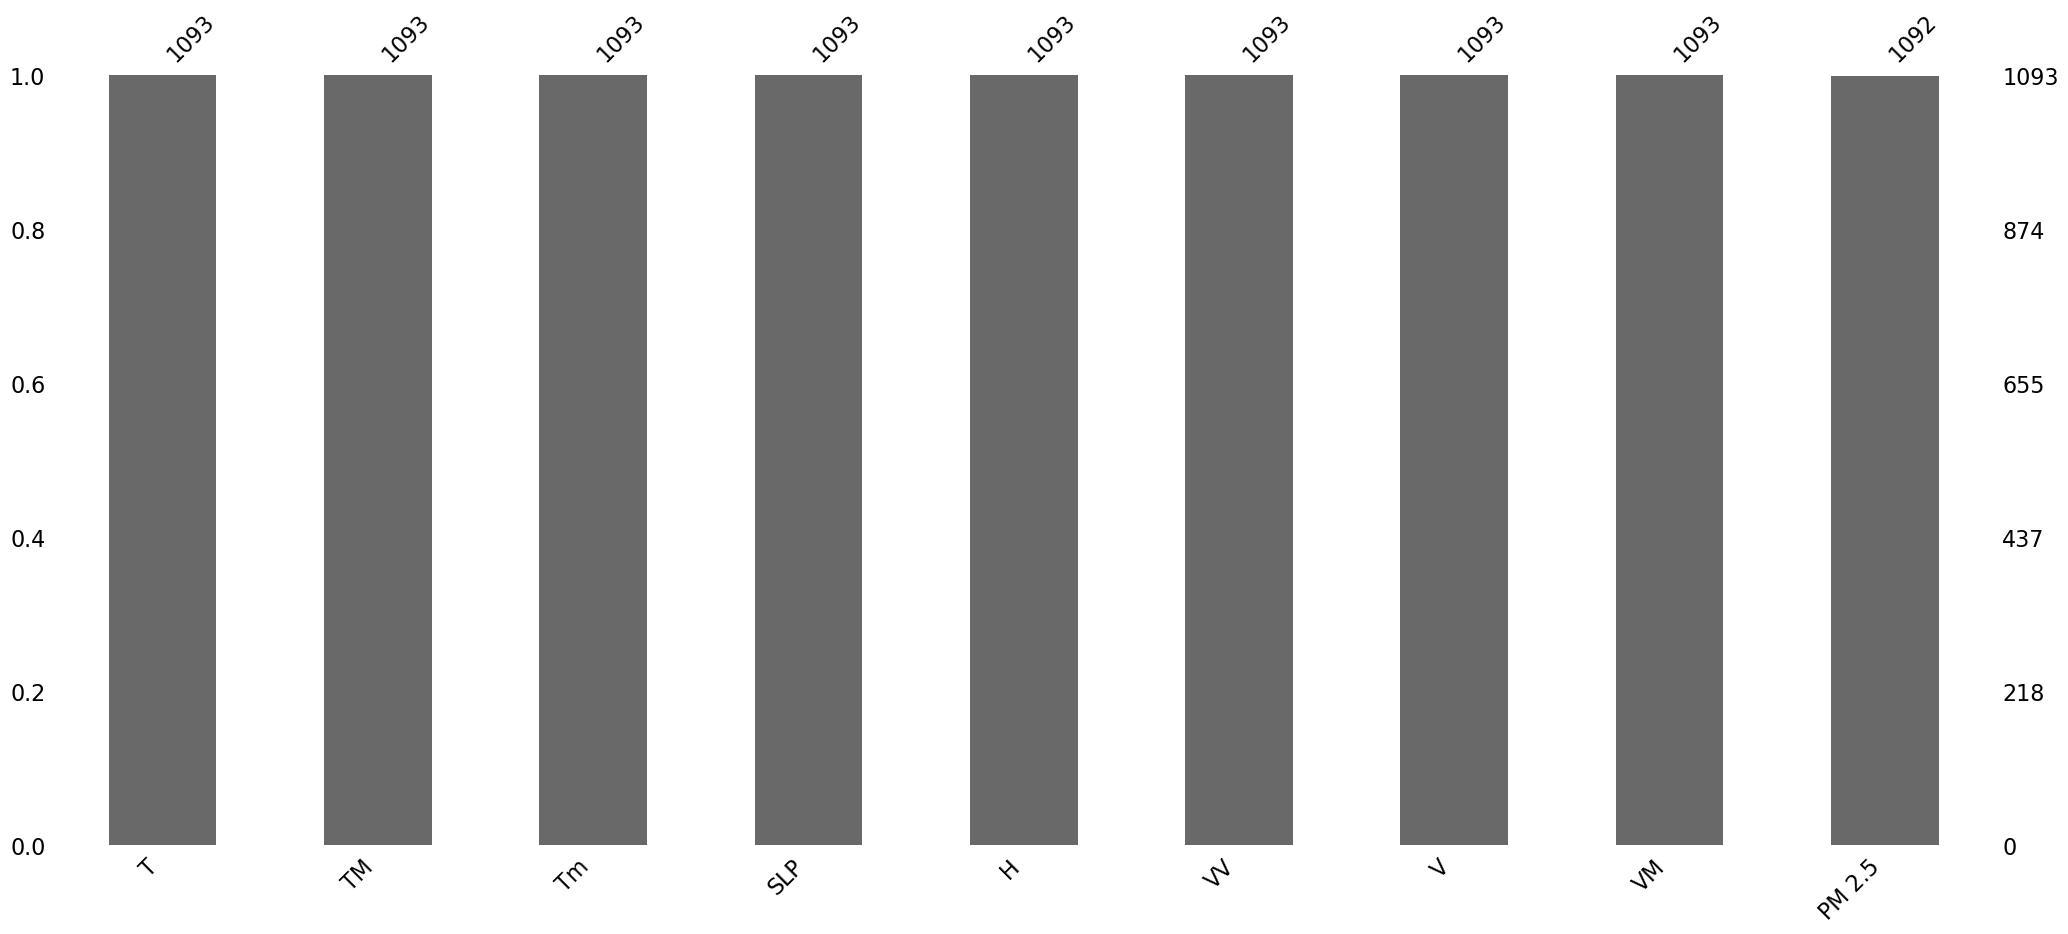

In [11]:
# visualizing null values

import missingno as msno

msno.bar(df)
plt.show()

**As PM 2.5 has only one NULL value it is good to drop the Rows corresponding to that NULL value**

In [12]:
df = df.dropna(subset=['PM 2.5'])

**Now lets see the NULL values Distribution**

In [13]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  1092


,Total Missing,In Percent
T,0,0.0
TM,0,0.0
Tm,0,0.0
SLP,0,0.0
H,0,0.0
VV,0,0.0
V,0,0.0
VM,0,0.0
PM 2.5,0,0.0


**Feature Selection using Heatmap**

<Axes: >

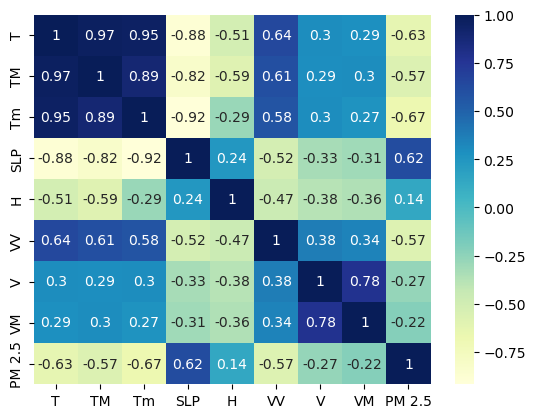

In [14]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="YlGnBu")

**Here H(Average Relative Humidity) has a correlation near 0 so it would not bring a signicant change in predicting our target variable PM 2.5**

**We can drop that Column but as there as not so many column in our analysis we can keep it**

**Multivariate Graphs for Analysing the correlation**

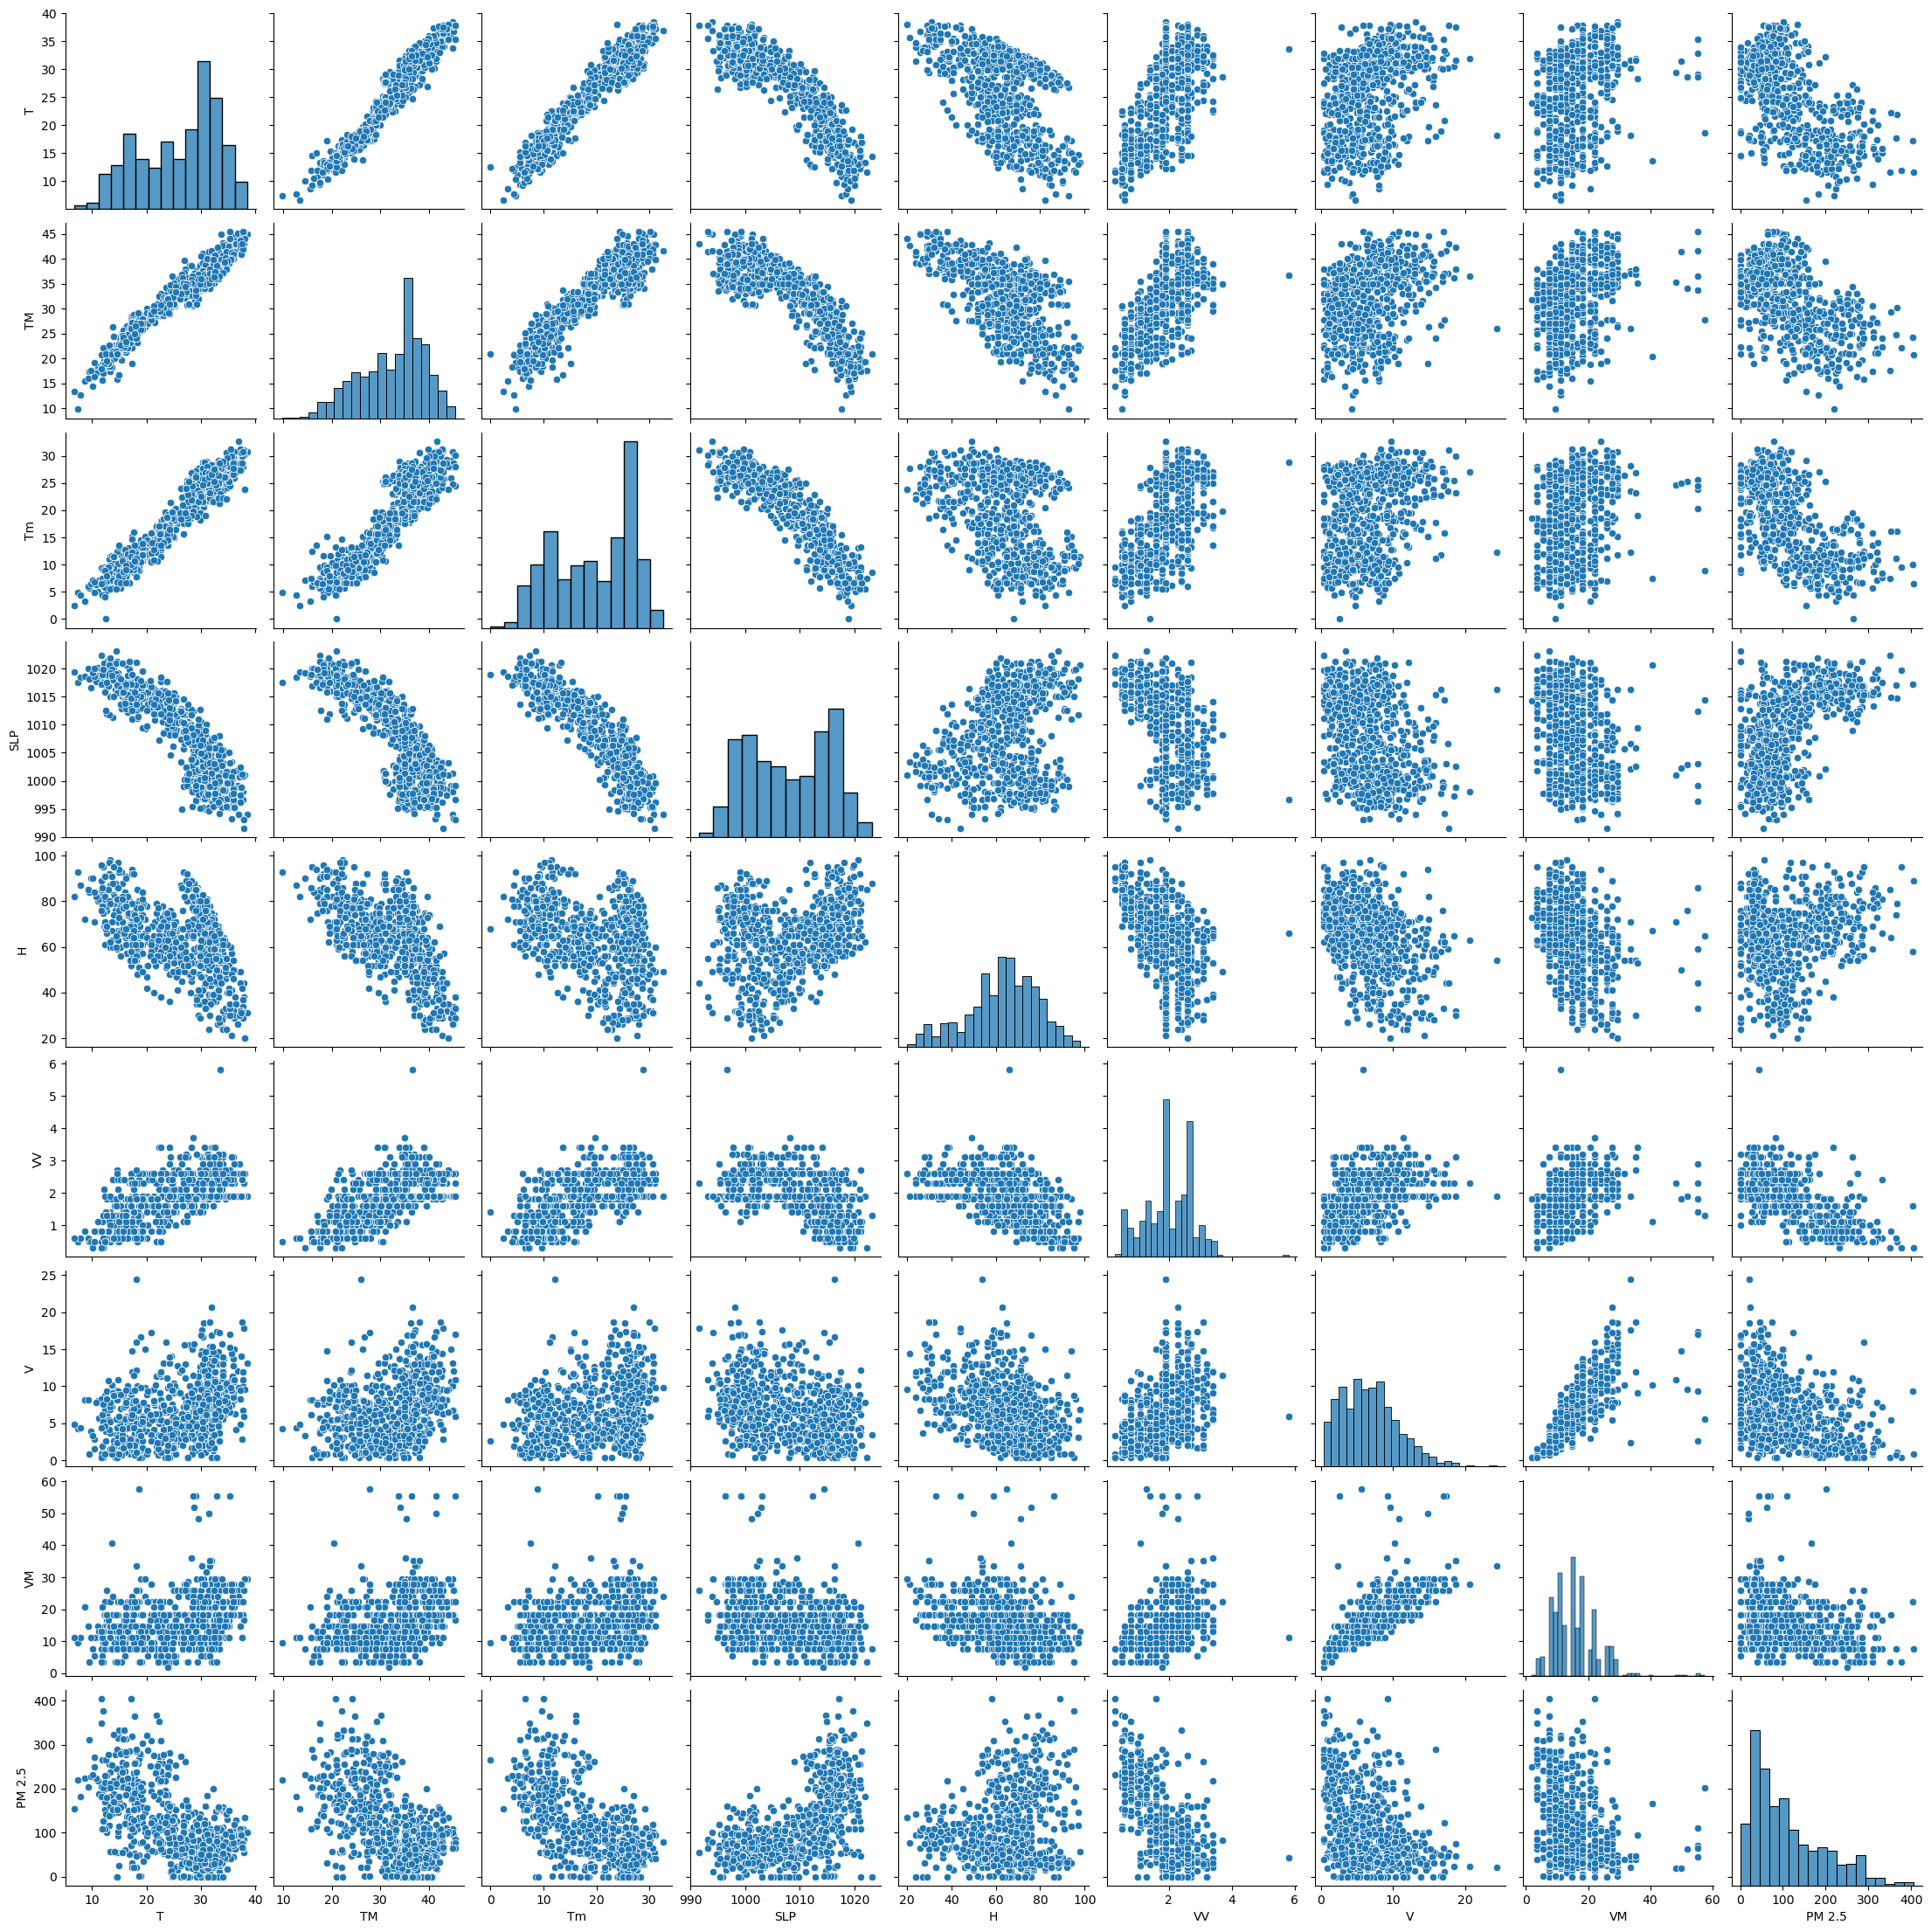

In [15]:
sns.pairplot(df)

**Feature Selection using  Tree Based Regressor**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

**Independent features->X->All columns except PM 2.5**
 
**Dependent Features->y->PM 2.5 Column**

In [16]:
X = df.drop('PM 2.5',axis=1)
y = df['PM 2.5']

#OR 

# X=df.iloc[:,:-1] ## independent features
# y=df.iloc[:,-1] ## dependent features


In [17]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [18]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [19]:
model.feature_importances_

array([0.17084417, 0.08908188, 0.20128689, 0.163799  , 0.08641951,
       0.19375228, 0.05185374, 0.04296253])

**Here are the TOP features**

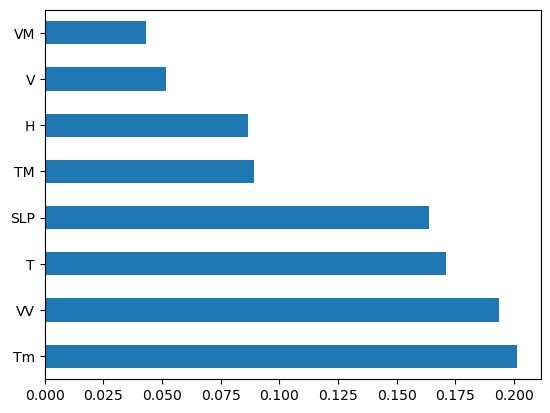

In [20]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

<Axes: xlabel='PM 2.5', ylabel='Density'>

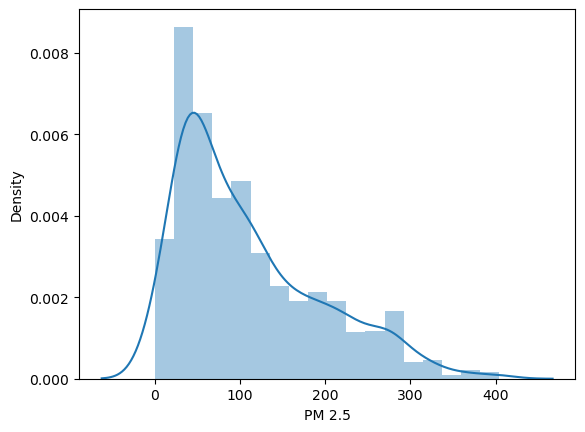

In [21]:
sns.distplot(y)

**Count Plot**

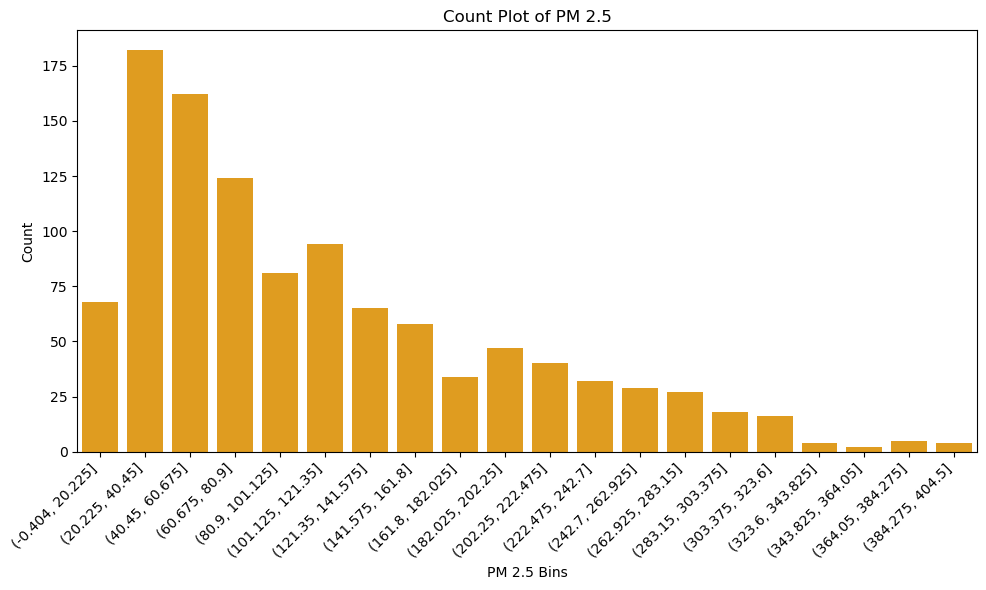

In [22]:
y = df['PM 2.5']

# Number of bins for binning the 'PM 2.5' values
num_bins = 20

# Binning the 'PM 2.5' values into discrete categories
binned_pm25 = pd.cut(y, bins=num_bins)

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x=binned_pm25, color='orange')
plt.xlabel('PM 2.5 Bins')
plt.ylabel('Count')
plt.title('Count Plot of PM 2.5')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
plt.tight_layout()
plt.show()

**Outlier Detection**

In [23]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_outlier_boundary = Q1 - 1.5 * IQR
upper_outlier_boundary = Q3 + 1.5 * IQR

# Identify the outliers
outliers = y[(y < lower_outlier_boundary) | (y > upper_outlier_boundary)]

# Display the outliers
print("Outliers:")
print(outliers)

Outliers:
189     404.500000
192     376.916667
362     349.291667
524     365.750000
527     353.041667
719     365.291667
724     403.958333
900     365.291667
905     403.958333
1081    365.291667
1086    403.958333
Name: PM 2.5, dtype: float64


**As there are very less outliers no need to remove them**

# ***Model Training***

**Train Test Split**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# *Linear Regression*

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Coefficient and Intercepts**

In [26]:
print("Slopes of the Independent Features",lr.coef_)
print("Intercept ", lr.intercept_)

Slopes of the Independent Features [ -2.69090829   0.46219975  -3.86705184  -0.04494855  -1.21193616
 -40.11490762  -2.53563257   0.56148181]
Intercept  448.1161696758816


In [27]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,-2.690908
TM,0.462200
Tm,-3.867052
SLP,-0.044949
H,-1.211936
VV,-40.114908
V,-2.535633
VM,0.561482


1. **Cross-Validation Score**: Cross-validation is a technique used to estimate how well a model will generalize to new, unseen data. It helps to assess the model's performance on different subsets of the data and gives an idea of how the model is likely to perform on new data. The cross-validation score is an array of scores obtained from each fold of cross-validation and can be used to calculate the mean and standard deviation of the scores.

2. **Coefficient of Determination (R-squared)**: The R-squared score is a single metric that represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features) in the model. It indicates how well the model fits the data, with values ranging from 0 to 1. A higher R-squared value indicates a better fit of the model to the data, but a high R-squared does not necessarily mean the model will generalize well to new data.

**Coefficient of Determination for the Training Set**

This explains upto which extent our Linear regression has fitted the training Data

In [28]:
x1 = lr.score(X_train,y_train)
print(x1)

0.551516808175875


**Coefficient of Determination for the Test set**

This explains upto which extent our Linear regression has fitted the test Data

In [29]:
x2 = lr.score(X_test,y_test)
print(x2)

0.48525331308567876


**Cross Validation Score**

This explains upto what extent our model will work on the unseen Data

In [30]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X,y,cv=5)
print(score)
print(score.mean())

[0.51616617 0.43816894 0.50733957 0.4861091  0.40750087]
0.4710569304807393


**Regression Evaluation Metrics**

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 44.84
Mean Squared Error (MSE): 3687.54
Root Mean Squared Error (RMSE): 60.73
R-squared (R2) Score: 0.49


**Lets analyse the Predicted and Test variables using Distplot**

<Axes: xlabel='PM 2.5', ylabel='Density'>

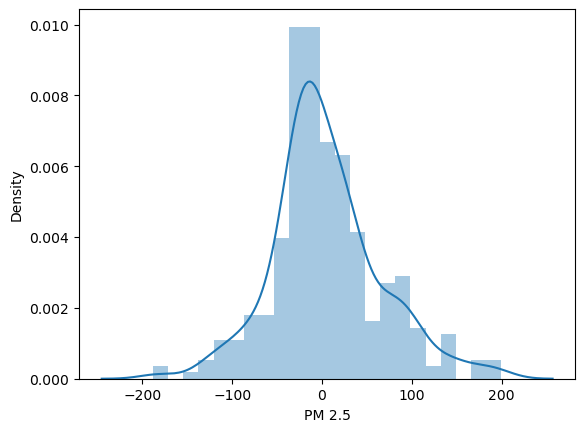

In [32]:
sns.distplot(y_test-y_pred)

**Scatterplot of ytest and ypred**

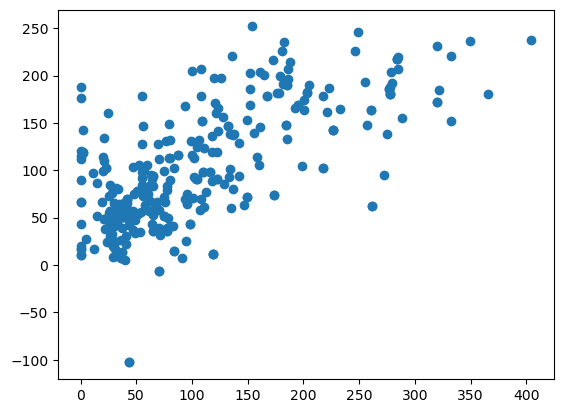

In [33]:
plt.scatter(y_test,y_pred)

In [34]:
import pickle 
# open a file, where you ant to store the data
file = open('LinearRegression.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)

**Check Mean Squared Error for Comparison**

In [35]:
lr=LinearRegression()
mse=cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-3686.201777339885


# ***Ridge Regression (HPT of Linear Regression)***

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
rr=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
rr.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

**The Best Parameter and best Score**

In [37]:
print(rr.best_params_)
print(rr.best_score_)

{'alpha': 40}
-3664.364899607169


**Regression Metrics**

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict on the test set
y_pred1 = rr.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = mean_squared_error(y_test, y_pred1, squared=False)
r2 = r2_score(y_test, y_pred1)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 44.64
Mean Squared Error (MSE): 3627.09
Root Mean Squared Error (RMSE): 60.23
R-squared (R2) Score: 0.49


**Lets analyse the Predicted and Test variables using Distplot**

<Axes: xlabel='PM 2.5', ylabel='Density'>

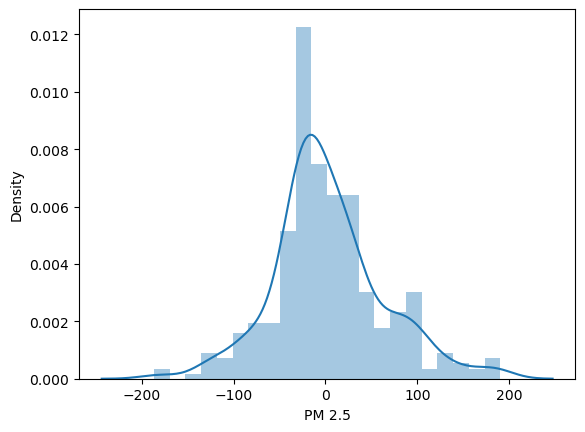

In [39]:
sns.distplot(y_test-y_pred1)

**Visualisation with the Scatterplot**

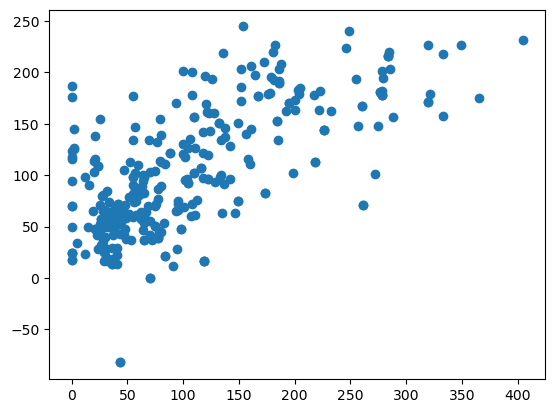

In [40]:
plt.scatter(y_test,y_pred1)

In [41]:
import pickle 
# open a file, where you want to store the data
file = open('RidgeRegression.pkl', 'wb')

# dump information to that file
pickle.dump(rr, file)

# ***Lasso Regression(HPT of Linear Regression)***

In [42]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasr=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasr.fit(X,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

**The Best Parameter and the Best Score**

In [43]:
print(lasr.best_params_)
print(lasr.best_score_)

{'alpha': 1}
-3666.78325343702


**Regression Metrics**

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict on the test set
y_pred2 = lasr.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = mean_squared_error(y_test, y_pred2, squared=False)
r2 = r2_score(y_test, y_pred2)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 44.51
Mean Squared Error (MSE): 3627.81
Root Mean Squared Error (RMSE): 60.23
R-squared (R2) Score: 0.49


**Lets Analyse ypred and ytest using Distplot**

<Axes: xlabel='PM 2.5', ylabel='Density'>

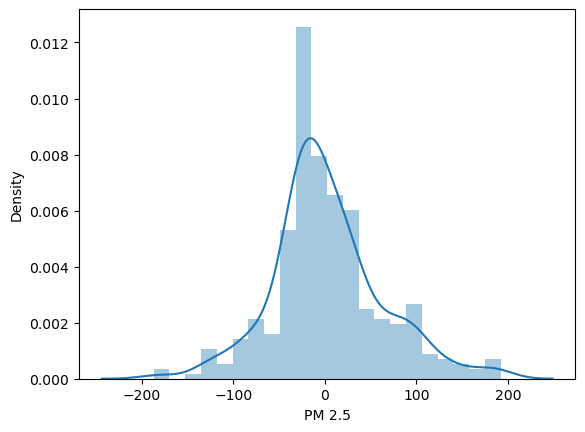

In [45]:
sns.distplot(y_test-y_pred2)

**Visulisation with Scatterplot**

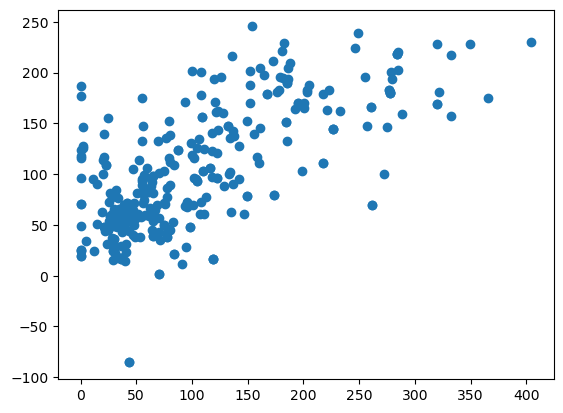

In [46]:
plt.scatter(y_test,y_pred2)

In [47]:
import pickle 
# open a file, where you want to store the data
file = open('LassoRegression.pkl', 'wb')

# dump information to that file
pickle.dump(lasr, file)

# ***Decision Tree Regression***

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

**Tree Visualization**

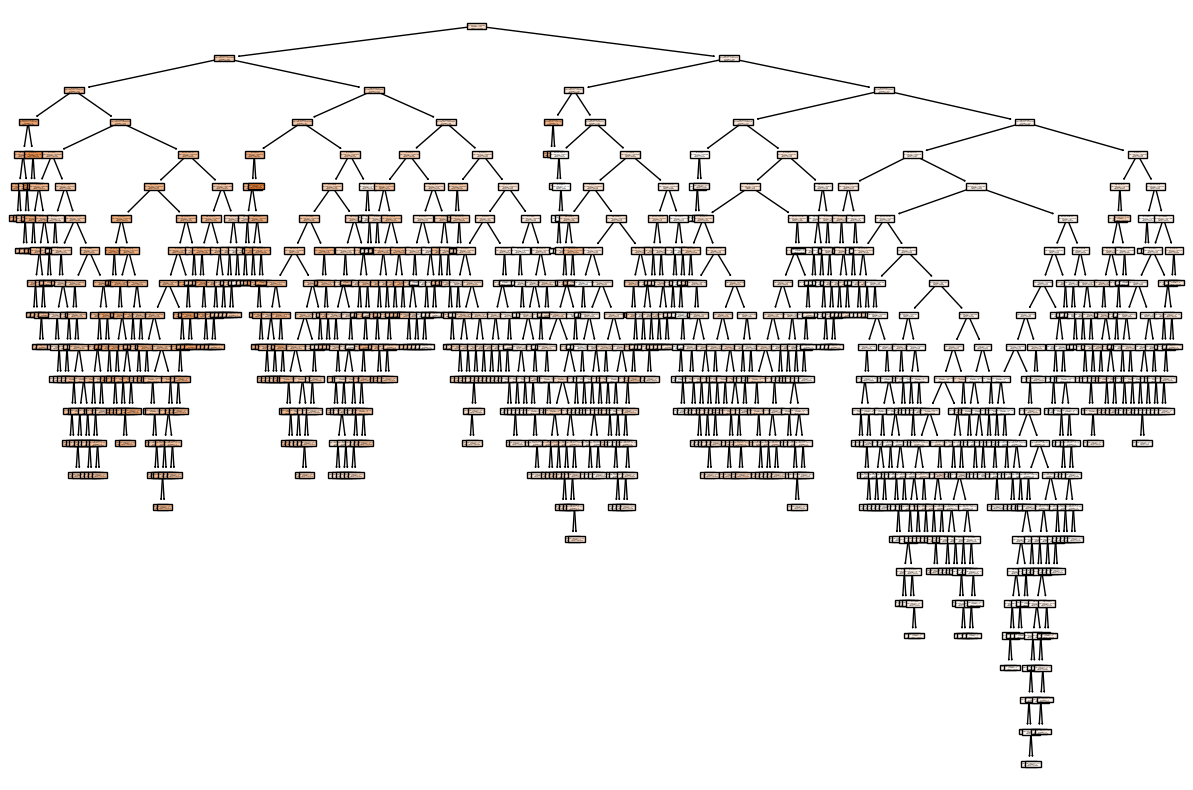

<Figure size 640x480 with 0 Axes>

In [55]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dtree, filled=True, feature_names=X_train.columns)
plt.show()
plt.savefig('decision_tree_plot.png')

**Coefficient of Determination (r^2) for the Training Set**

This explains upto which extent our Decision Tree regression has fitted the training Data

In [56]:
a1 = dtree.score(X_train,y_train)
print(a1)

1.0


**Coefficient of Determination (r^2) for the Test Set**

This explains upto which extent our Decision Tree regression has fitted the training Data

In [57]:
a2 = dtree.score(X_test,y_test)
print(a2)

0.7063658791168861


**This is purely the case of overfitting, our training score is 1 but our test core is only 0.7 , so we will apply Hyper Parameter Tuning ahead to prevent the case of overfitting** 

**Cross Validation Score**

This explains upto what extent our model will work on the unseen Data

In [58]:
from sklearn.model_selection import cross_val_score
score1=cross_val_score(dtree,X,y,cv=5)
print(score1)
print(score1.mean())

[ 0.09053763 -0.48569491  0.71779448  1.          1.        ]
0.46452744025541337


**Regression Evaluation Metrics**

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict on the test set
y_pred3 = dtree.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
rmse = mean_squared_error(y_test, y_pred3, squared=False)
r2 = r2_score(y_test, y_pred3)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 23.02
Mean Squared Error (MSE): 2103.54
Root Mean Squared Error (RMSE): 45.86
R-squared (R2) Score: 0.71


**Lets analyse the Predicted and Test variables using Distplot**

<Axes: xlabel='PM 2.5', ylabel='Density'>

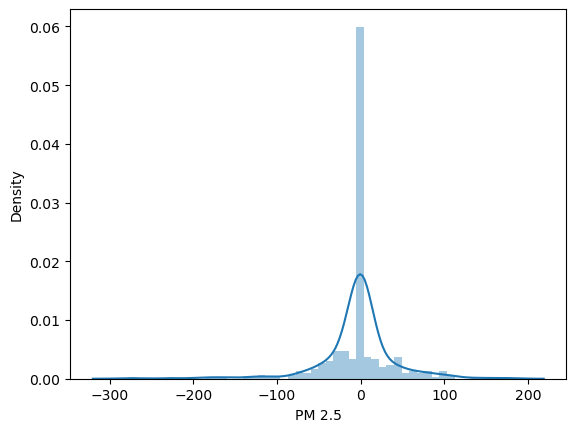

In [61]:
sns.distplot(y_test-y_pred3)

**Scatterplot of Ytest and Ypred**

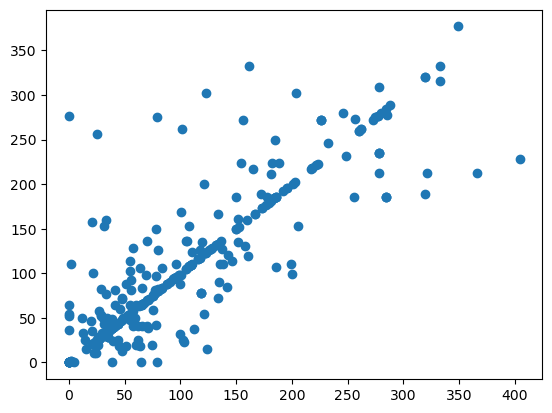

In [63]:
plt.scatter(y_test,y_pred3)

In [65]:
import pickle 
# open a file, where you ant to store the data
file = open('DecisionTreeRegression.pkl', 'wb')

# dump information to that file
pickle.dump(dtree, file)

# ***Decision Tree Regression with HyperParameter Tuning***

* splitter: The strategy used to choose the split at each node. It can take values 'best' or 'random'.
* max_depth: The maximum depth of the tree.
* min_samples_leaf: The minimum number of samples required to be at a leaf node.
* min_weight_fraction_leaf: The minimum weighted fraction of the total number of samples required to be at a leaf node.
* max_features: The number of features to consider when looking for the best split. It can take values 'auto', 'log2', 'sqrt', or None.
* max_leaf_nodes: The maximum number of leaf nodes in the tree.

In [66]:
## Hyper Parameter Optimization
#a dictionary params that contains hyperparameter values 
#and their respective ranges for 
#hyperparameter optimization of a decision tree model. 
#These hyperparameters will be used to search for the best combination of 
#hyperparameters using techniques like Grid Search
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : [1.0,"log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [ ]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV
dtreehpt=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)
dtreehpt.fit(X,y)

**Best Parameters and Best Score**

In [69]:
print(dtreehpt.best_params_)
print(dtreehpt.best_score_)

{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 40, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
-3131.648961917888


**Regression Metrics**

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict on the test set
y_pred4 = dtreehpt.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred4)
mse = mean_squared_error(y_test, y_pred4)
rmse = mean_squared_error(y_test, y_pred4, squared=False)
r2 = r2_score(y_test, y_pred4)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 40.14
Mean Squared Error (MSE): 3171.81
Root Mean Squared Error (RMSE): 56.32
R-squared (R2) Score: 0.56


**Lets Analyse ypred and ytest using Distplot**

<Axes: xlabel='PM 2.5', ylabel='Density'>

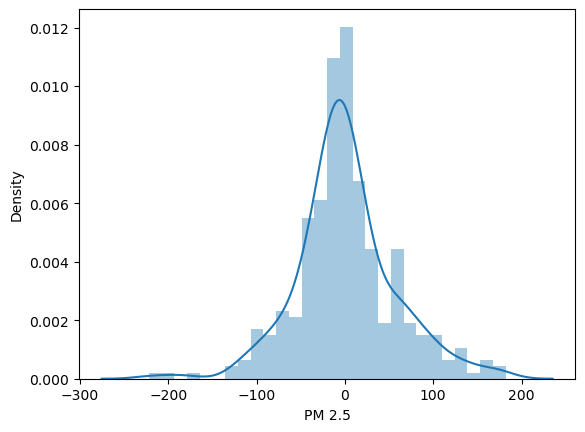

In [71]:
sns.distplot(y_test-y_pred4)

**Lets Visualize with Scatterplot**

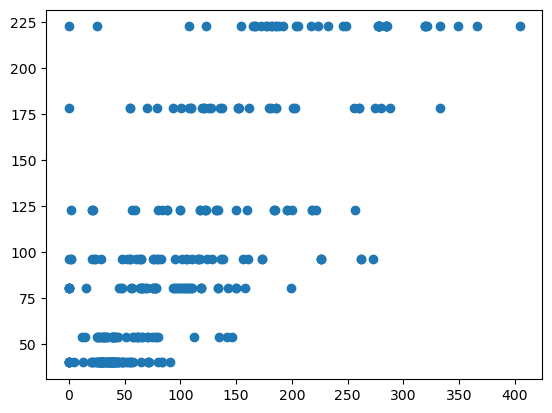

In [72]:
plt.scatter(y_test,y_pred4)

In [73]:
# open a file, where you ant to store the data
file = open('dtreewithhpt.pkl', 'wb')

# dump information to that file
pickle.dump(dtreehpt, file)

# ***Random Forest Regression***

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

**Coefficient of Determination (r^2) for the Training set**


In [75]:
a1 = rf.score(X_train,y_train)
print(a1)

0.9730385003474941


**Coefficient of Determination(r^2) for the testing set**

In [76]:
a2 = rf.score(X_test,y_test)
print(a2)

0.7807737436049298


**Cross Validation Score**

In [77]:
from sklearn.model_selection import cross_val_score
score2=cross_val_score(rf,X,y,cv=5)
print(score2)
print(score2.mean())

[0.56451906 0.29619805 0.81915091 0.98992848 0.95836563]
0.7256324264449929


**Regression Evaluation Metrics**

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict on the test set
y_pred5 = rf.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred5)
mse = mean_squared_error(y_test, y_pred5)
rmse = mean_squared_error(y_test, y_pred5, squared=False)
r2 = r2_score(y_test, y_pred5)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 24.56
Mean Squared Error (MSE): 1570.49
Root Mean Squared Error (RMSE): 39.63
R-squared (R2) Score: 0.78


**Distplot**

<Axes: xlabel='PM 2.5', ylabel='Density'>

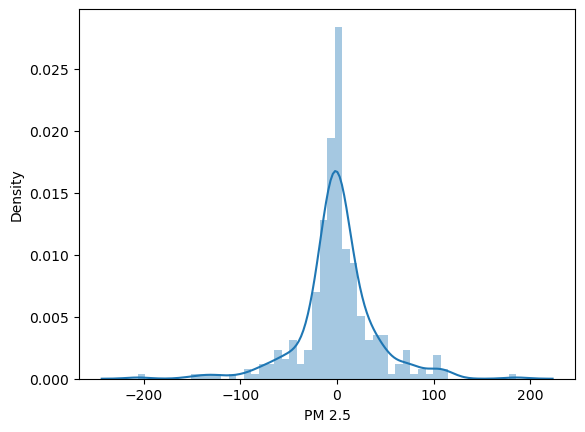

In [80]:
sns.distplot(y_test-y_pred5)

**Scatterplot**

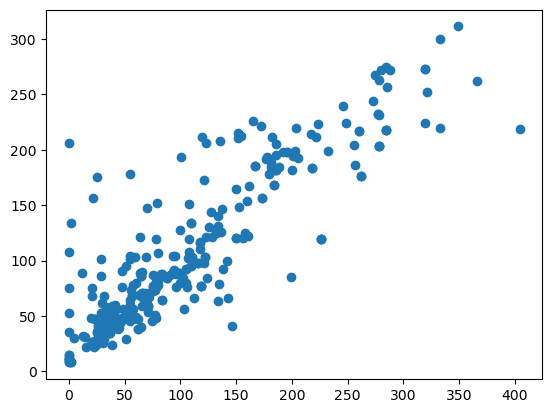

In [81]:
plt.scatter(y_test,y_pred5)

In [82]:
import pickle 
# open a file, where you ant to store the data
file = open('randomforest.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)

# ***Random Forest Regression using Hyperparameter Tuning***

In [85]:
from sklearn.model_selection import RandomizedSearchCV

**Randomized Search CV**

In [87]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

**Random Grid Parameters**

In [88]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


**HyperParameter Tuning using RandomizeSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rfhpt= RandomizedSearchCV(rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
rfhpt.fit(X_train,y_train)

**Best Parameters & Score**

In [92]:
print(rfhpt.best_params_)
print(rfhpt.best_score_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}
-1542.1016852686585


# ***Regression Metrics for Random Forest using HPT***

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict on the test set
y_pred6 = rfhpt.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred6)
mse = mean_squared_error(y_test, y_pred6)
rmse = mean_squared_error(y_test, y_pred6, squared=False)
r2 = r2_score(y_test, y_pred6)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 24.59
Mean Squared Error (MSE): 1677.14
Root Mean Squared Error (RMSE): 40.95
R-squared (R2) Score: 0.77


**Distplot**

<Axes: xlabel='PM 2.5', ylabel='Density'>

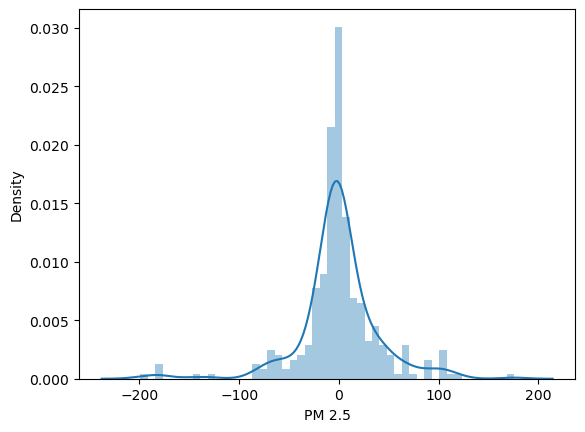

In [94]:
sns.distplot(y_test-y_pred6)

**Scatterplot**

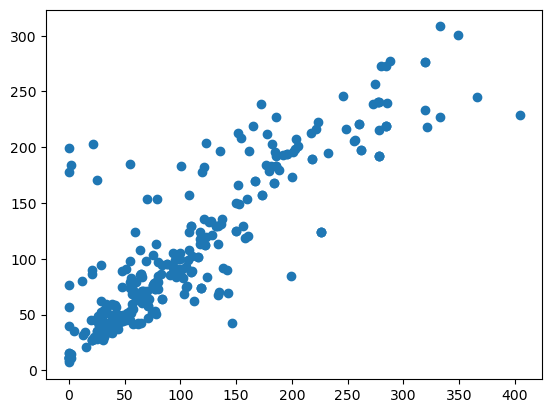

In [95]:
plt.scatter(y_test,y_pred6)

In [96]:
import pickle 
# open a file, where you ant to store the data
file = open('randomforesthpt.pkl', 'wb')

# dump information to that file
pickle.dump(rfhpt, file)

# ***XgBoost Regressor***

In [97]:
import xgboost as xgb
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**Coefficient of Determination(r^2) on train set**

This explains upto which extent our Xgboost has fitted the training Data

In [98]:
c1 = xgbr.score(X_train,y_train)
print(c1)

0.9997717196345083


**Coefficeint of Determination (r^2) on test set**

This explains upto which extent our Xgboost has fitted the Test Data

In [99]:
c2 = xgbr.score(X_test,y_test)
print(c2)

0.8123312908288712


**Cross Validation Score**

This explains upto what extent our model will work on the unseen Data

In [100]:
from sklearn.model_selection import cross_val_score
score4=cross_val_score(xgbr,X,y,cv=5)
print(score4)
print(score4.mean())

[0.52024079 0.29335179 0.81301019 0.9997314  0.9993042 ]
0.7251276747945072


**Regression Evaluation Metrics for Xgboost**

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict on the test set
y_pred7 = xgbr.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred7)
mse = mean_squared_error(y_test, y_pred7)
rmse = mean_squared_error(y_test, y_pred7, squared=False)
r2 = r2_score(y_test, y_pred7)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 19.58
Mean Squared Error (MSE): 1344.42
Root Mean Squared Error (RMSE): 36.67
R-squared (R2) Score: 0.81


**DistPlot**

<Axes: xlabel='PM 2.5', ylabel='Density'>

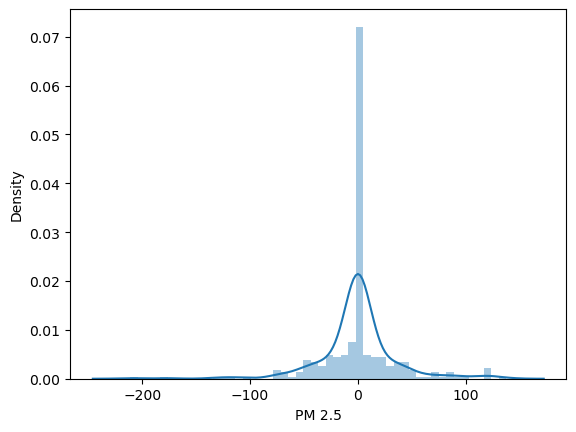

In [102]:
sns.distplot(y_test-y_pred7)

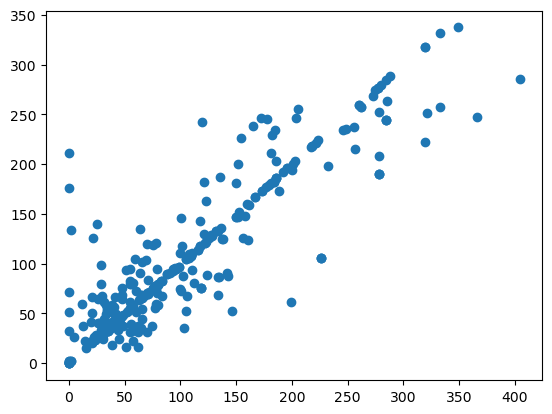

In [103]:
plt.scatter(y_test,y_pred7)

In [104]:
import pickle 
# open a file, where you ant to store the data
file = open('xgboost.pkl', 'wb')

# dump information to that file
pickle.dump(xgbr, file)

# ***Xgboost with HyperParameter Tuning***

**RandomizedSearchCV**

In [105]:
from sklearn.model_selection import RandomizedSearchCV
 #Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

**Random Grid Parameters**

In [106]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


**Randomgrid Search to search the best Hyperparameter and fit the Xgboost according to the best Parameters**

In [ ]:
xgbrhpt = RandomizedSearchCV(xgbr, param_distributions = random_grid,scoring='neg_mean_squared_error',n_iter =100, cv=5, verbose =2, random_state=42, n_jobs=1)
xgbrhpt.fit(X_train,y_train)

**Best Parameters and Score**

In [108]:
print(xgbrhpt.best_params_)
print(xgbrhpt.best_score_)

{'subsample': 0.8, 'n_estimators': 1100, 'min_child_weight': 3, 'max_depth': 30, 'learning_rate': '0.05'}
-1380.6366880668838


# ***Regression Metrics for XGBoost using HPT***

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict on the test set
y_pred8 = xgbrhpt.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred8)
mse = mean_squared_error(y_test, y_pred8)
rmse = mean_squared_error(y_test, y_pred8, squared=False)
r2 = r2_score(y_test, y_pred8)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 19.03
Mean Squared Error (MSE): 1355.71
Root Mean Squared Error (RMSE): 36.82
R-squared (R2) Score: 0.81


<Axes: xlabel='PM 2.5', ylabel='Density'>

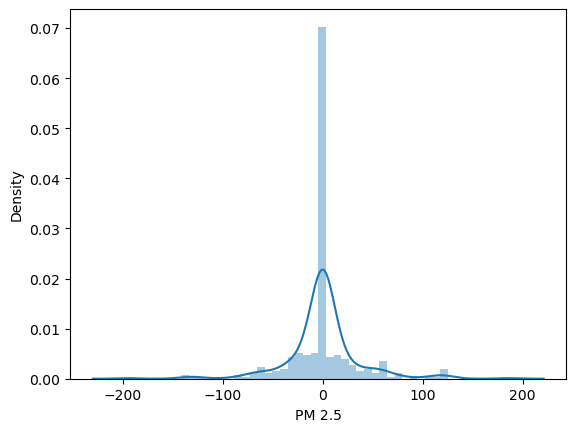

In [110]:
sns.distplot(y_test-y_pred8)

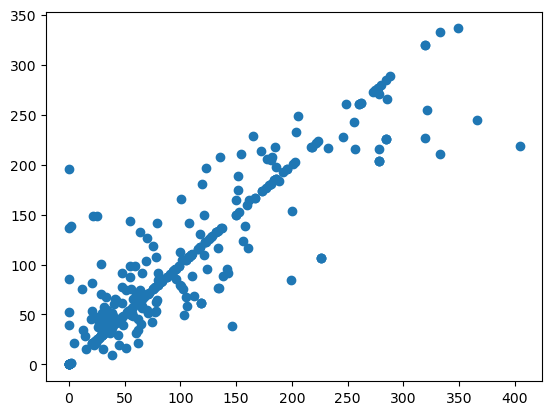

In [111]:
plt.scatter(y_test,y_pred8)

In [ ]:
import pickle 
# open a file, where you ant to store the data
file = open('xgboosthpt.pkl', 'wb')

# dump information to that file
pickle.dump(xgbrhpt, file)